In [1]:
from core.encoder import MessageEncoder
from core.draw import Visualizer

%matplotlib inline

In [2]:
message = 'Дуфник П.М.'

vis = Visualizer('black', 'black', 3.0)

encoder = MessageEncoder(message, 1000, vis)
print('Message:', message)
encoder.lab_repr()

Message: Дуфник П.М.
HEX: C4 F3 F4 ED E8 EA 20 CF 2E CC 2E
BIN: 1100010011110011111101001110110111101000111010100010000011001111001011101100110000101110

11 байт
88 бит


# Манчестерское кодирование

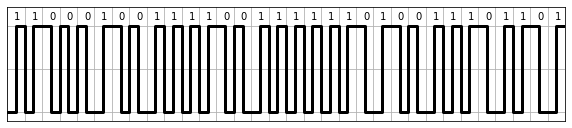


f_high = 1000 / 1 = 1000.0 MHz
f_low = 1000 / 2 = 500.0 MHz
f_mid = ((36 / 1)*f0 + (28 / 2)*f0) / 64 = 781.25 MHz
S = 7 * 1000.0 - 500.0 = 6500.0 MHz



In [3]:
code = encoder.phys_encode('manchester')
code.draw()
code.lab_repr()

# NRZ

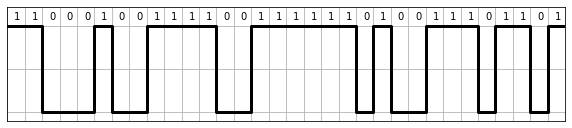


f_high = 1000 / 2 = 500.0 MHz
f_low = 1000 / 6 = 166.66666666666666 MHz
f_mid = ((6 / 1)*f0 + (10 / 2)*f0 + (6 / 3)*f0 + (4 / 4)*f0 + (6 / 6)*f0) / 32 = 234.375 MHz
S = 7 * 500.0 - 166.66666666666666 = 3333.3333333333335 MHz



In [4]:
code = encoder.phys_encode('nrz')
code.draw()
code.lab_repr()

# RZ

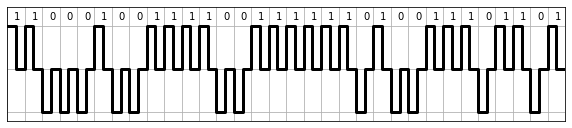


f_high = 1000 / 1 = 1000.0 MHz
f_low = 1000 / 4 = 250.0 MHz
f_mid = ((6 / 1)*f0 + (10 / 2)*f0 + (6 / 3)*f0 + (4 / 4)*f0 + (6 / 6)*f0) / 32 = 468.75 MHz
S = 7 * 1000.0 - 250.0 = 6750.0 MHz



In [5]:
code = encoder.phys_encode('rz')
code.draw()
code.lab_repr()

# AMI

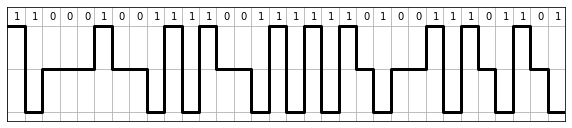


f_high = 1000 / 2 = 500.0 MHz
f_low = 1000 / 8 = 125.0 MHz
f_mid = ((20 / 1)*f0) / 32 = 312.5 MHz
S = 7 * 500.0 - 125.0 = 3375.0 MHz



In [6]:
code = encoder.phys_encode('ami')
code.draw()
code.lab_repr()

# NRZI

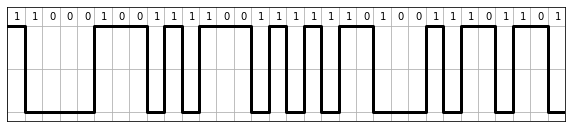


f_high = 1000 / 2 = 500.0 MHz
f_low = 1000 / 4 = 250.0 MHz
f_mid = ((13 / 1)*f0 + (6 / 2)*f0 + (9 / 3)*f0 + (4 / 4)*f0) / 32 = 312.5 MHz
S = 7 * 500.0 - 250.0 = 3250.0 MHz



In [7]:
code = encoder.phys_encode('nrzi')
code.draw()
code.lab_repr()

# Избыточное кодирование

In [8]:
red_encoder = encoder.redundant_logic_encoder()
red_encoder.lab_repr(False)
print('Избыточность:', f'{red_encoder.byte_len - encoder.byte_len}/{encoder.byte_len}=0.25 (25%)')

HEX: D2 BB 5E AB 9B E4 B9 6A 7B 5D A7 35 AA 1C
BIN: 11010010101110110101111010101011100110111110010010111001011010100111101101011101101001110011010110101010011100

13.75 байт
110 бит
Избыточность: 2.75/11.0=0.25 (25%)


Manchester


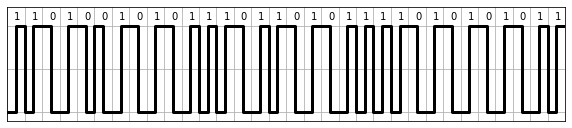


f_high = 1000 / 1 = 1000.0 MHz
f_low = 1000 / 2 = 500.0 MHz
f_mid = ((20 / 1)*f0 + (44 / 2)*f0) / 64 = 656.25 MHz
S = 7 * 1000.0 - 500.0 = 6500.0 MHz




AMI


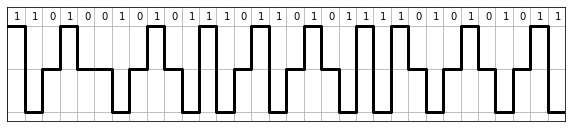


f_high = 1000 / 2 = 500.0 MHz
f_low = 1000 / 8 = 125.0 MHz
f_mid = ((20 / 1)*f0) / 32 = 312.5 MHz
S = 7 * 500.0 - 125.0 = 3375.0 MHz



In [9]:
print('Manchester')
code = red_encoder.phys_encode('manchester')
code.draw()
code.lab_repr()

print('\n\n')


print('AMI')
code = red_encoder.phys_encode('ami')
code.draw()
code.lab_repr()

# Скремблирование

In [10]:
polynom, scramble_encoder = encoder.scramble()
print()
print('Полином:', polynom)
scramble_encoder.lab_repr()

[Scramble]  Input 6
[Scramble]  (3, 5) 5
[Scramble]  (5, 7) 5
[Scramble]  (3, 7) 5

Полином: (3, 5)
HEX: D9 18 33 17 A1 DF 3E E4 99 21 06
BIN: 1101100100011000001100110001011110100001110111110011111011100100100110010010000100000110

11 байт
88 бит


Manchester


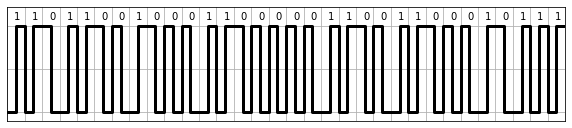


f_high = 1000 / 1 = 1000.0 MHz
f_low = 1000 / 2 = 500.0 MHz
f_mid = ((36 / 1)*f0 + (28 / 2)*f0) / 64 = 781.25 MHz
S = 7 * 1000.0 - 500.0 = 6500.0 MHz




AMI


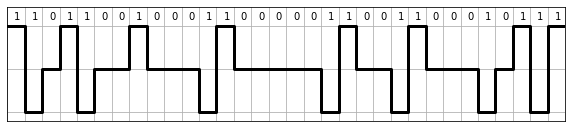


f_high = 1000 / 2 = 500.0 MHz
f_low = 1000 / 8 = 125.0 MHz
f_mid = ((15 / 1)*f0) / 32 = 234.375 MHz
S = 7 * 500.0 - 125.0 = 3375.0 MHz



In [11]:
print('Manchester')
code = scramble_encoder.phys_encode('manchester')
code.draw()
code.lab_repr()

print('\n\n')


print('AMI')
code = scramble_encoder.phys_encode('ami')
code.draw()
code.lab_repr()

# Тест

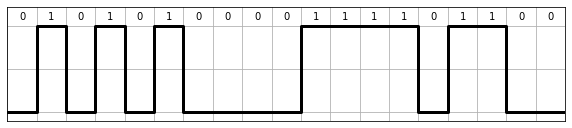


f_high = 1 / 2 = 0.5 MHz
f_low = 1 / 6 = 0.16666666666666666 MHz
f_mid = ((7 / 1)*f0 + (4 / 2)*f0 + (8 / 4)*f0) / 19 = 0.2894736842105263 MHz
S = 7 * 0.5 - 0.16666666666666666 = 3.3333333333333335 MHz



In [12]:
test = '0101010000111101100'
encoder = MessageEncoder('0', 1, vis, len(test))
encoder.update_message(test)

code = encoder.phys_encode('nrz')
code.draw()
code.lab_repr()

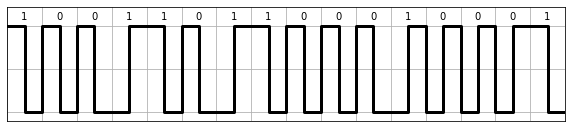

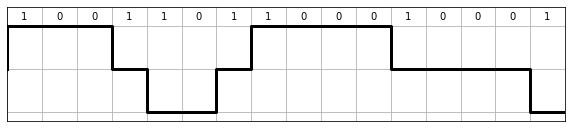

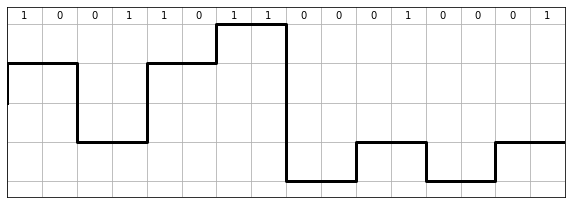

In [13]:
encoder.update_message('1001101100010001')

code = encoder.phys_encode('manchester-diff')
code.draw()

code = encoder.phys_encode('mlt-3')
code.draw()

code = encoder.phys_encode('pam-5')
code.draw()